In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import seaborn
import seaborn as sb

# import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Optimization
from sklearn.model_selection import GridSearchCV, cross_val_score

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# creating Dataframe object
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df['quality'].replace({"bad",0}, inplace=True)
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
266,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4
565,12.7,0.600,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5
736,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5
578,8.8,0.470,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
1160,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
409,12.5,0.460,0.49,4.5,0.070,26.0,49.0,0.99810,3.05,0.57,9.6,4
166,6.8,0.640,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,5


Text(0, 0.5, 'alcohol')

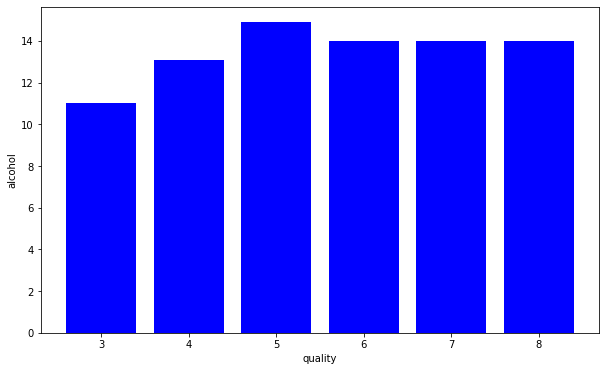

In [4]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')


<AxesSubplot:>

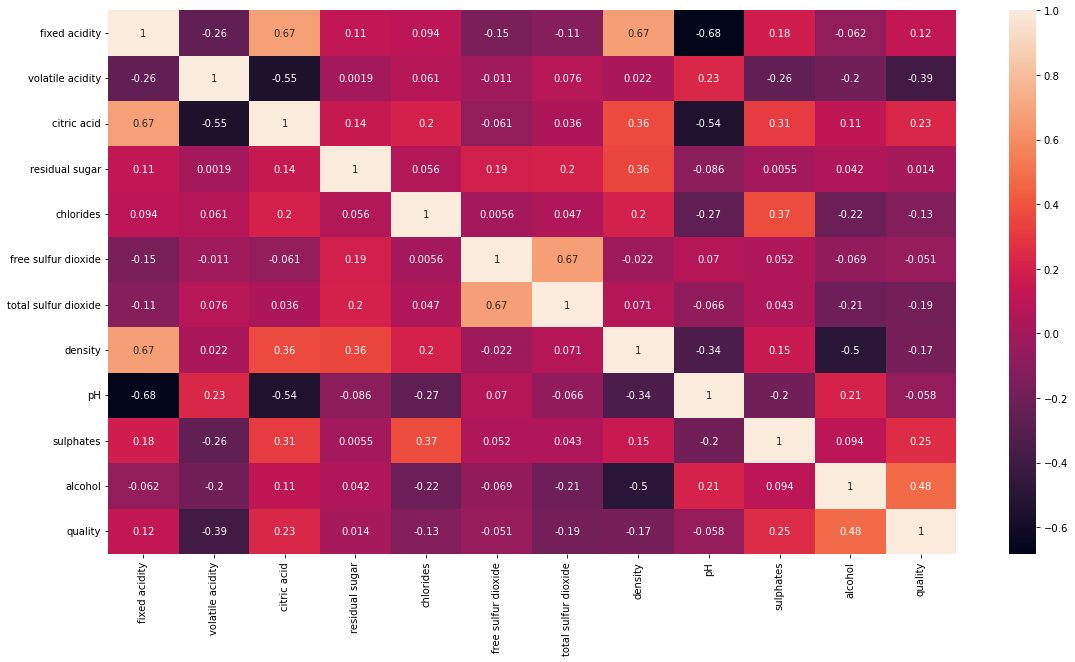

In [5]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sb.heatmap(df.corr(),annot=True)

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
df['quality'] = df['quality'].mask(df['quality'] < 7, 0)
df['quality'] = df['quality'].mask(df['quality'] >= 7, 1)

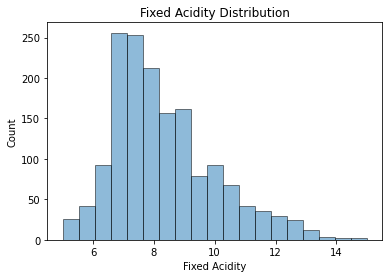

In [8]:
# Function: Plot Histogram
import math
def plot_hist(data, alpha, title, xlabel, ylabel) :
   bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   20)
   plt.hist(data, bins=bins, alpha=alpha, edgecolor='black')

   plt.title(title)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)

   plt.show()
    
plot_hist(df['fixed acidity'], 0.5, 'Fixed Acidity Distribution', 'Fixed Acidity', 'Count')

In [9]:
df['fixed acidity'] = pd.qcut(df['fixed acidity'], q=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], precision=1.0)
df['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [10]:
df['volatile acidity'] = pd.qcut(df['volatile acidity'], q=10,  labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], precision=1.0)

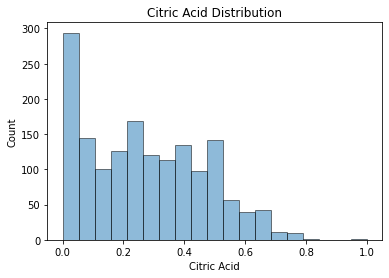

In [11]:
plot_hist(df['citric acid'], 0.5, 'Citric Acid Distribution', 'Citric Acid', 'Count')

In [12]:
df['citric acid'] = pd.qcut(df['citric acid'], q=4, labels=[0, 1, 2, 3], precision=1.0)

In [13]:
df['residual sugar'] = df['residual sugar'].mask(df['residual sugar'] < 1, 0)
# df['residual sugar'] = df['residual sugar'].mask((df['residual sugar'] >= 1) & (df['residual sugar'] <= 10), 1)

In [14]:
df['chlorides'].describe()


count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [15]:
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.9) &
(df['free sulfur dioxide'] >= 92), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.8) & (df['pH'] < 3.9) &
(df['free sulfur dioxide'] >= 78) & (df['free sulfur dioxide'] < 92), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.7) & (df['pH'] < 3.8) &
(df['free sulfur dioxide'] >= 64) & (df['free sulfur dioxide'] < 78), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.8) & (df['pH'] < 3.9) &
(df['free sulfur dioxide'] >= 50) & (df['free sulfur dioxide'] < 64), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.7) & (df['pH'] < 3.8) &
(df['free sulfur dioxide'] >= 40) & (df['free sulfur dioxide'] < 50), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.8) & (df['pH'] < 3.9) &
(df['free sulfur dioxide'] >= 31) & (df['free sulfur dioxide'] < 40), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.7) & (df['pH'] < 3.8) &
(df['free sulfur dioxide'] >= 27) & (df['free sulfur dioxide'] < 31), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.8) & (df['pH'] < 3.9) &
(df['free sulfur dioxide'] >= 21) & (df['free sulfur dioxide'] < 27), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.7) & (df['pH'] < 3.8) &
(df['free sulfur dioxide'] >= 17) & (df['free sulfur dioxide'] < 21), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] >= 3.8) & (df['pH'] < 3.9) &
(df['free sulfur dioxide'] >= 12) & (df['free sulfur dioxide'] < 17), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask((df['pH'] < 3.0) &
(df['free sulfur dioxide'] < 12), 1)
df['free sulfur dioxide'] = df['free sulfur dioxide'].mask(df['free sulfur dioxide'] != 1, 0)

In [16]:
df['total sulfur dioxide'] = df['total sulfur dioxide'].mask(df['free sulfur dioxide'] == 0, 0)
df['total sulfur dioxide'] = df['total sulfur dioxide'].mask(df['free sulfur dioxide'] == 1, 1)

In [17]:
df['density'].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

In [18]:
df['density'] = pd.qcut(df['density'], q=4, labels=[0, 1, 2, 3], precision=1.0)

In [19]:
df['pH'] = df['pH'].mask(df['pH'] > 3.6, 2)
df['pH'] = df['pH'].mask(df['pH'] >= 3.3, 1)
df['pH'] = df['pH'].mask(df['pH'] < 3.3, 0)


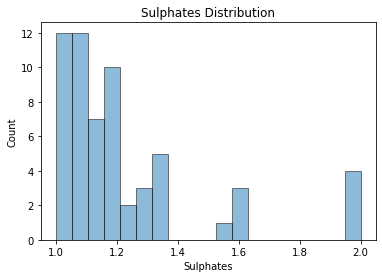

In [20]:
plot_hist(df['sulphates'], 0.5, 'Sulphates Distribution', 'Sulphates', 'Count')


In [21]:
df['sulphates'] = pd.qcut(df['sulphates'], q=4, labels=[0, 1, 2, 3], precision=1.0)


In [22]:
df['alcohol'] = df['alcohol'].mask(df['alcohol'] < 10, 0)
df['alcohol'] = df['alcohol'].mask((df['alcohol'] >= 10) & (df['alcohol'] < 11.5), 1)
df['alcohol'] = df['alcohol'].mask((df['alcohol'] >= 11.5) & (df['alcohol'] < 13.5), 2)
df['alcohol'] = df['alcohol'].mask(df['alcohol'] >= 13.5, 3)

In [23]:
new_df=df.drop('residual sugar',axis=1)
new_df

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3,8,0,0.076,0.0,0.0,2,0.0,1,0.0,0
1,4,9,0,0.098,0.0,0.0,2,0.0,2,0.0,0
2,4,9,0,0.092,0.0,0.0,2,0.0,2,0.0,0
3,9,0,3,0.075,0.0,0.0,3,0.0,1,0.0,0
4,3,8,0,0.076,0.0,0.0,2,0.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,0,6,0,0.090,0.0,0.0,0,0.0,1,1.0,0
1595,0,5,1,0.062,0.0,0.0,0,0.0,3,1.0,0
1596,0,4,1,0.076,0.0,0.0,1,0.0,3,1.0,0
1597,0,7,1,0.075,0.0,0.0,0,0.0,2,1.0,0


In [24]:
# Prediction Target
from sklearn.model_selection import train_test_split
Y = new_df["quality"]

# Predictors
X = new_df.drop("quality", axis=1)

# Split into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=0)

In [25]:
# Gaussian Naive Bayes
# Define Model
naive_bayes = GaussianNB()
# Score
naive_bayes_scores = cross_val_score(naive_bayes, X_train, Y_train, cv=10, scoring="accuracy")
# Print
print("Naive Bayes Cross-validation Scores:", naive_bayes_scores)
print("Mean:", naive_bayes_scores.mean())
print("Standard Deviation:", naive_bayes_scores.std())


Naive Bayes Cross-validation Scores: [0.79166667 0.76666667 0.84166667 0.825      0.775      0.85
 0.85833333 0.86666667 0.85833333 0.81512605]
Mean: 0.82484593837535
Standard Deviation: 0.03460095017548384


In [26]:
# Logistic Regression
# Define Model
log_reg = LogisticRegression()
# Score
log_reg_scores = cross_val_score(log_reg, X_train, Y_train, cv=10, scoring="accuracy")
# Print
print("Logistic Regression Cross-validation Scores:", log_reg_scores)
print("Mean:", log_reg_scores.mean())
print("Standard Deviation:", log_reg_scores.std())

Logistic Regression Cross-validation Scores: [0.85833333 0.88333333 0.88333333 0.86666667 0.84166667 0.9
 0.89166667 0.89166667 0.90833333 0.87394958]
Mean: 0.8798949579831934
Standard Deviation: 0.019105983708896275


In [27]:
svm = SVC()
# Score
svm_scores = cross_val_score(svm, X_train, Y_train, cv=10, scoring="accuracy")
# Print
print("Support Vector Machines Cross-validation Scores:", svm_scores)
print("Mean:", svm_scores.mean())
print("Standard Deviation:", svm_scores.std())

Support Vector Machines Cross-validation Scores: [0.84166667 0.89166667 0.84166667 0.86666667 0.84166667 0.89166667
 0.85833333 0.86666667 0.875      0.88235294]
Mean: 0.8657352941176472
Standard Deviation: 0.018711690326197534


In [28]:
# KNN
# Define Model
knn = KNeighborsClassifier(n_neighbors=3)
# Score
knn_scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring="accuracy")
# Print
print("KNN Cross-validation Scores:", knn_scores)
print("Mean:", knn_scores.mean())
print("Standard Deviation:", knn_scores.std())

KNN Cross-validation Scores: [0.85833333 0.775      0.86666667 0.86666667 0.825      0.89166667
 0.88333333 0.875      0.91666667 0.8487395 ]
Mean: 0.8607072829131652
Standard Deviation: 0.036941570707921326


In [29]:
# Random Forest
# Define Model
rand_forest = RandomForestClassifier(n_estimators=100)
# Score
rand_forest_scores = cross_val_score(rand_forest, X_train, Y_train, cv=10, scoring="accuracy")
# Print
print("Random Forest Cross-validation Scores:", rand_forest_scores)
print("Mean:", rand_forest_scores.mean())
print("Standard Deviation:", rand_forest_scores.std())

Random Forest Cross-validation Scores: [0.88333333 0.825      0.875      0.875      0.90833333 0.9
 0.88333333 0.88333333 0.89166667 0.8907563 ]
Mean: 0.8815756302521007
Standard Deviation: 0.021302803006253257


In [33]:
# Results
# Create Table Showing Best One
ml_scores = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression','Support Vector Machines',
              'K-Nearest Neighbors', 'Random Forest'],
    'Avg Score': [naive_bayes_scores.mean(), log_reg_scores.mean(), svm_scores.mean(),
                  knn_scores.mean(), rand_forest_scores.mean(),],
    'SD': [naive_bayes_scores.std(), log_reg_scores.std(),svm_scores.std(), knn_scores.std(),
           rand_forest_scores.std()]
    })
# Sort by Highest Score => Lowest Score
ml_scores_df = ml_scores.sort_values(by=['Avg Score', 'Model', 'SD'], ascending=False)
ml_scores_df = ml_scores_df.set_index('Model')
print(ml_scores_df)

                         Avg Score        SD
Model                                       
Random Forest             0.881576  0.021303
Logistic Regression       0.879895  0.019106
Support Vector Machines   0.865735  0.018712
K-Nearest Neighbors       0.860707  0.036942
Naive Bayes               0.824846  0.034601


In [35]:
# Random Forest
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, Y_train)
Y_pred = rand_forest.predict(X_val)
acc_rand_forest = accuracy_score(Y_val, Y_pred) * 100
print("Random Forest Accuracy Score: ", round(acc_rand_forest, 2,), "%")

Random Forest Accuracy Score:  89.75 %


In [36]:
importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rand_forest.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')

In [37]:
importance.head(15)

,importance
feature,
chlorides,0.268
volatile acidity,0.184
alcohol,0.147
fixed acidity,0.137
sulphates,0.104
density,0.081
citric acid,0.074
free sulfur dioxide,0.003
total sulfur dioxide,0.003


In [38]:
# Drop Less Important Feature
df = df.drop('residual sugar', axis=1)
df = df.drop('free sulfur dioxide', axis=1)
df = df.drop('total sulfur dioxide', axis=1)
df = df.drop('pH', axis=1)

#Training Random Forest Again
Y = df["quality"]
X = df.drop("quality", axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=0)

rand_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
rand_forest.fit(X_train, Y_train)
Y_pred = rand_forest.predict(X_val)
acc_rand_forest = accuracy_score(Y_val, Y_pred) * 100
print("Random Forest Accuracy Score: ", round(acc_rand_forest, 2,), "%")

Random Forest Accuracy Score:  90.5 %


In [39]:
print("out-of-bag score:", round(rand_forest.oob_score_, 3)*100, "%")

out-of-bag score: 88.8 %


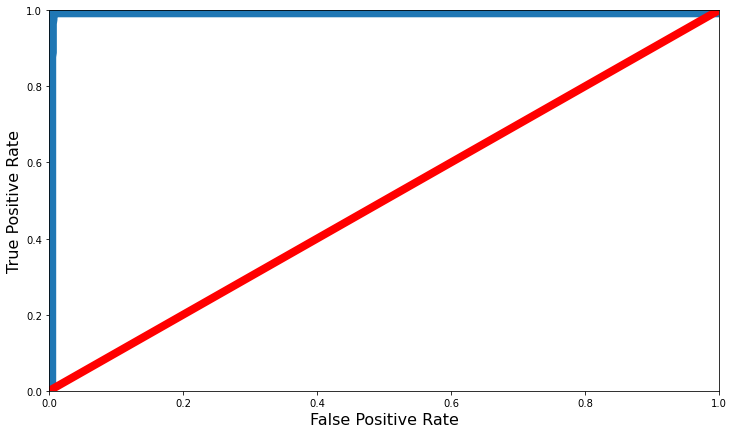

In [47]:
# Getting the probabilities of our predictions
y_scores = rand_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

# Calculate False Positive and True Positive
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# Function: Plotting False Positive against True Positive
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None) :
    plt.plot(false_positive_rate, true_positive_rate, linewidth=14, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=8)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(12, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [48]:
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC AUC-Score:", r_a_score)

ROC AUC-Score: 0.9998556418559362
